In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data.shape

(891, 12)

In [9]:
data.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [10]:
data.drop(columns="Cabin",axis=1,inplace=True)

In [11]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [12]:
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

In [13]:
a=data.isnull().sum()

In [14]:
a.sum()

0

In [16]:
data.duplicated().sum()

0

In [17]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

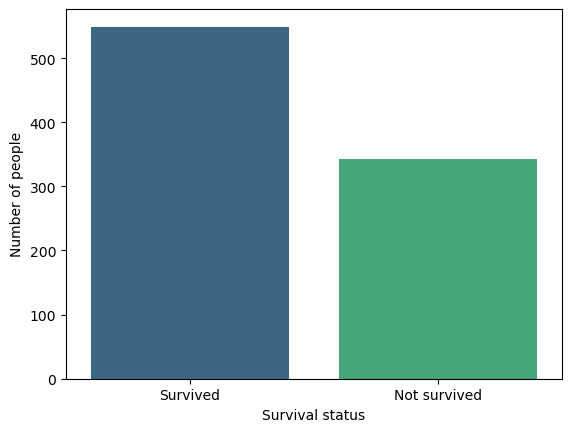

In [18]:
sns.countplot(x='Survived',data=data,palette='viridis')
plt.xlabel('Survival status')
plt.ylabel('Number of people')
plt.xticks(ticks=[0,1],labels=['Survived','Not survived'])
plt.show()

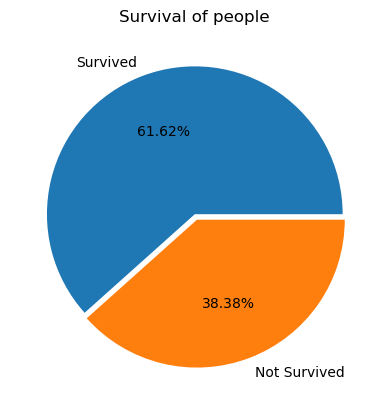

In [19]:
plt.pie(data['Survived'].value_counts(),explode=[0,0.04],autopct="%1.2f%%",labels=['Survived','Not Survived'])
plt.title('Survival of people')
plt.show()

In [20]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

<Axes: xlabel='Sex', ylabel='count'>

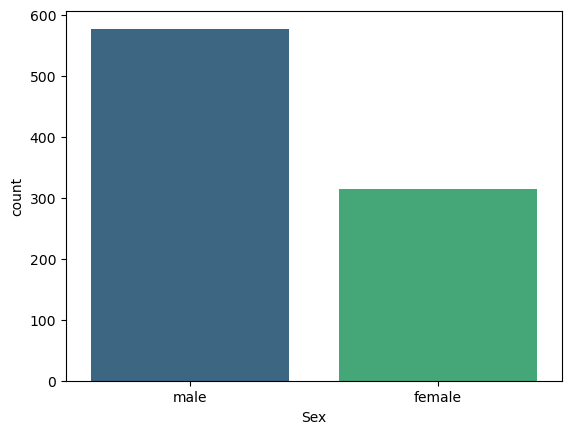

In [22]:
sns.countplot(x='Sex',data=data,palette='viridis')

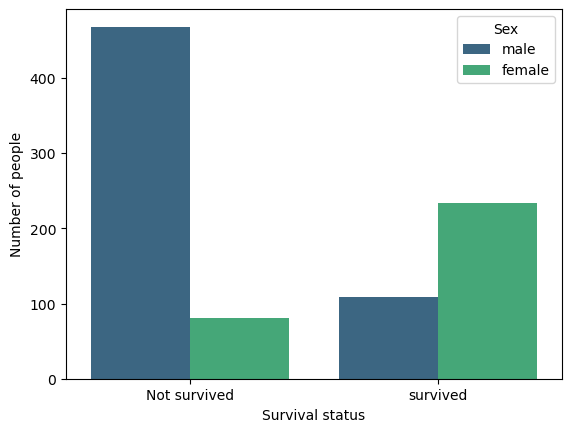

In [23]:
sns.countplot(x='Survived',hue='Sex',data=data,palette='viridis')
plt.xlabel('Survival status')
plt.ylabel('Number of people')
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.show()

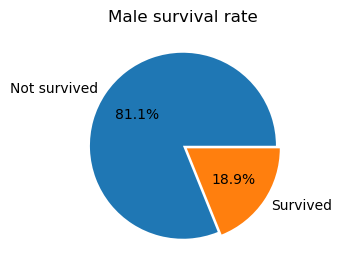

In [25]:
data[data['Sex'] == 'male'].Survived.groupby(data.Survived).count().plot(kind='pie',
figsize=(3, 6),explode=[0,0.05],autopct='%1.1f%%',labels=["Not survived","Survived"])
plt.ylabel("")
plt.title("Male survival rate")
plt.show()


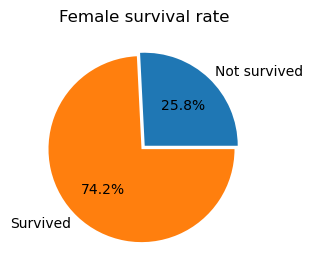

In [27]:
data[data['Sex'] == 'female'].Survived.groupby(data.Survived).count().plot(kind='pie',
figsize=(3, 6),explode=[0,0.05],autopct='%1.1f%%',labels=["Not survived","Survived"])
plt.ylabel("")
plt.title("Female survival rate")
plt.show()

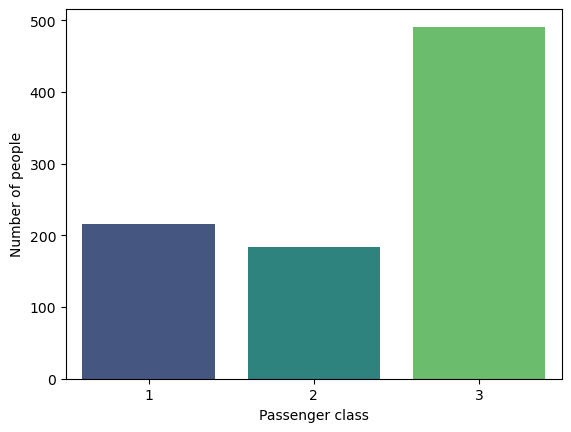

In [28]:
sns.countplot(x='Pclass',data=data,palette='viridis')
plt.xlabel('Passenger class')
plt.ylabel('Number of people')
plt.show()

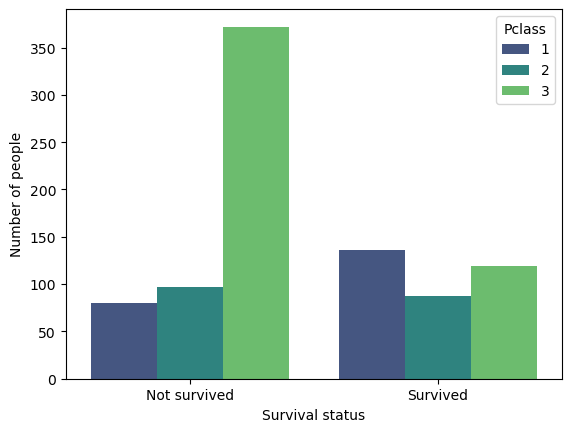

In [29]:
sns.countplot(x='Survived',hue='Pclass',data=data,palette='viridis')
plt.xlabel('Survival status')
plt.ylabel('Number of people')
plt.xticks(ticks=[0,1],labels=['Not survived','Survived'])
plt.show()

C:\Users\hp\anaconda3\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\hp\AppData\Local\Temp\ipykernel_10296\2912341948.py:2: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


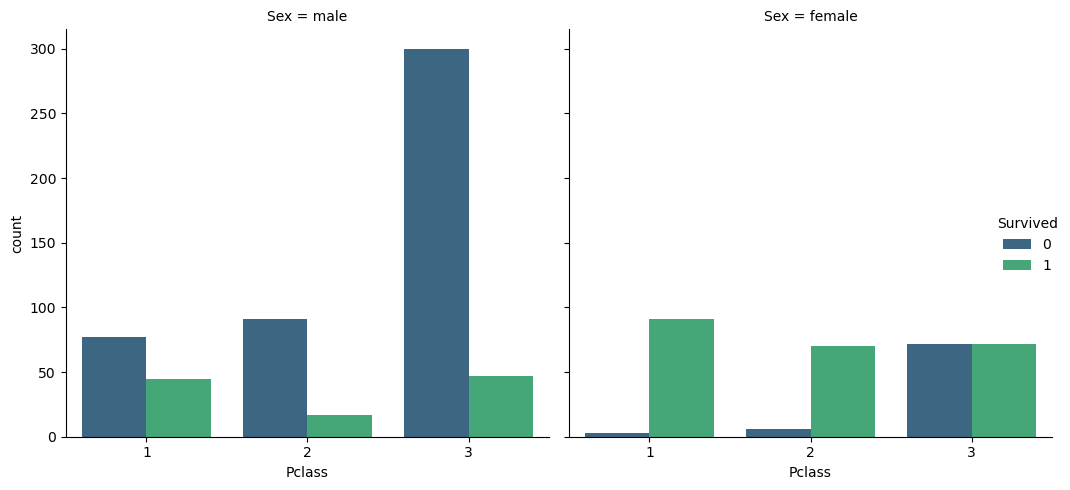

In [32]:
sns.catplot(x='Pclass',hue='Survived',col='Sex',kind='count',data=data,palette='viridis')
plt.tight_layout()

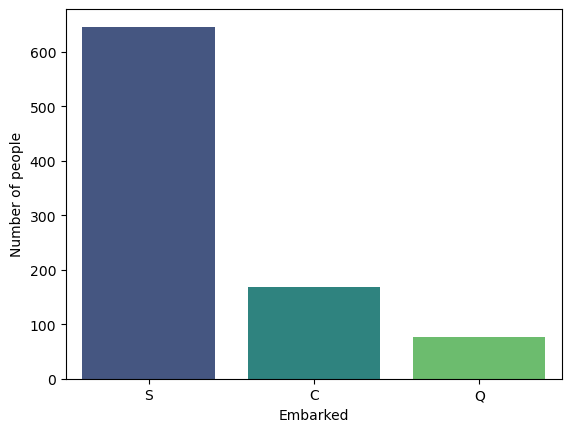

In [35]:
sns.countplot(x='Embarked',data=data,palette='viridis')
plt.xlabel('Embarked')
plt.ylabel('Number of people')
plt.show()

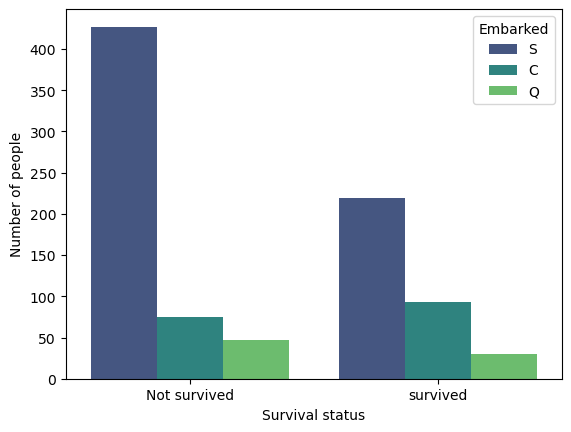

In [36]:
sns.countplot(x='Survived',hue='Embarked',data=data,palette='viridis')
plt.xlabel('Survival status')
plt.ylabel('Number of people')
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.show()

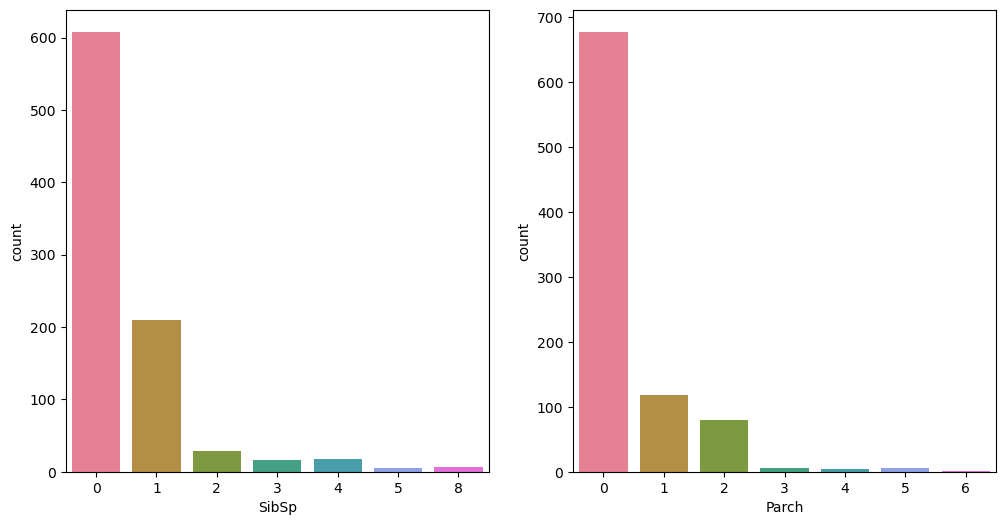

In [37]:
fig,axes = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(x='SibSp',data=data,ax=axes[0],palette='husl')
sns.countplot(x='Parch',data=data,ax=axes[1],palette='husl')
plt.show()

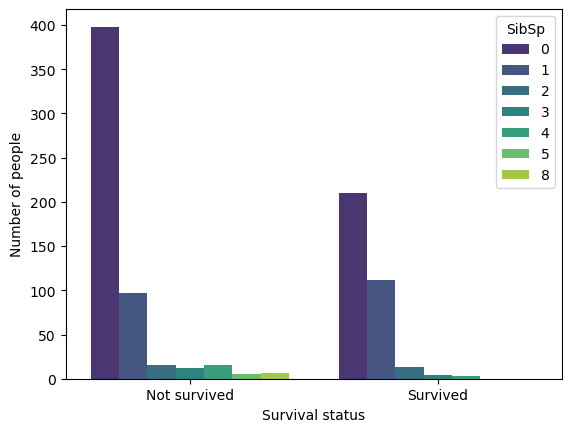

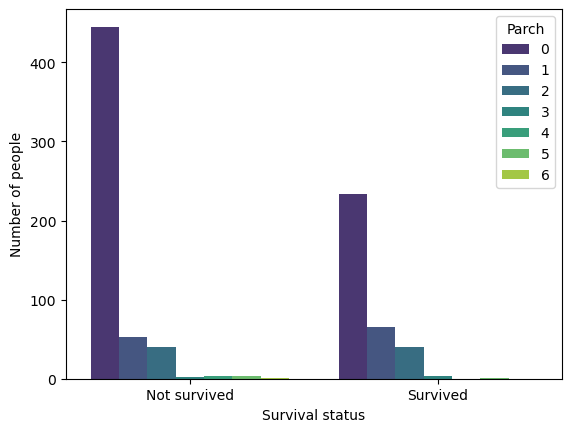

In [42]:
sns.countplot(x='Survived',hue='SibSp',data=data,palette='viridis')
plt.xlabel("Survival status")
plt.ylabel('Number of people')
plt.xticks(ticks=[0,1],labels=['Not survived','Survived'])
plt.show()

sns.countplot(x='Survived',hue='Parch',data=data,palette='viridis')
plt.xlabel("Survival status")
plt.ylabel('Number of people')
plt.xticks(ticks=[0,1],labels=['Not survived','Survived'])
plt.show()

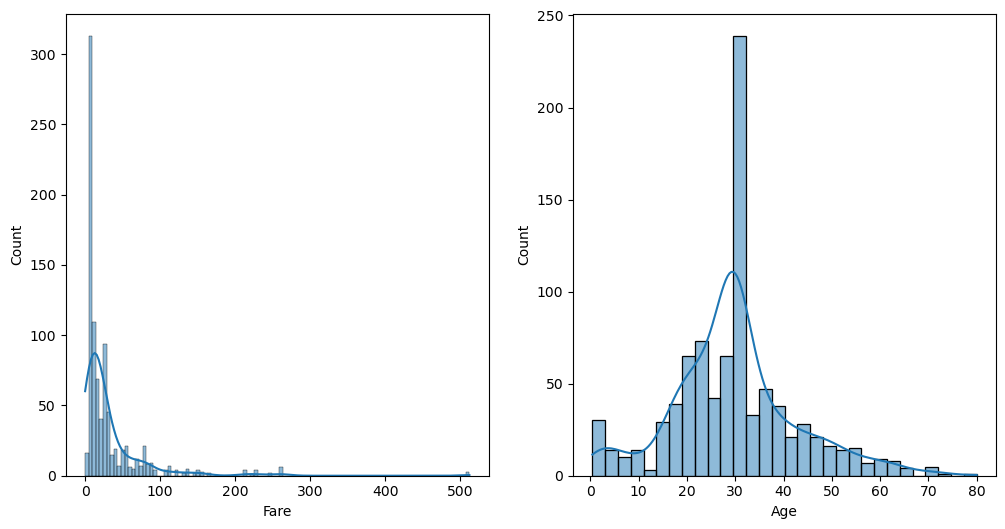

In [43]:
fig,axes = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(data['Fare'], kde=True,ax=axes[0])
sns.histplot(data['Age'].dropna(),kde=True,ax=axes[1])
plt.show()

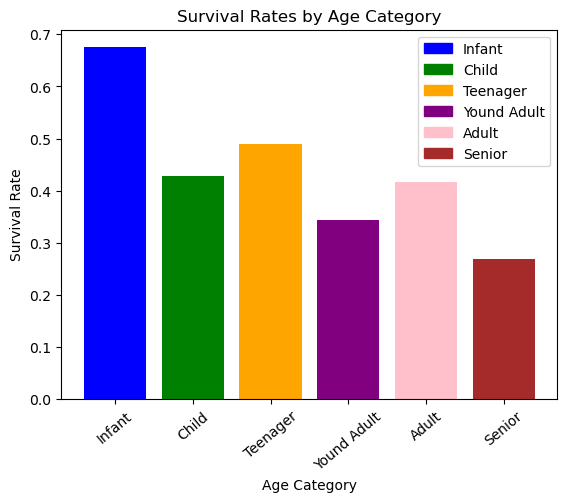

In [44]:
cut_points=[0,5,12,18,35,60,100]
label_names=['Infant','Child','Teenager','Yound Adult','Adult','Senior']
data['Age categories']=pd.cut(data['Age'],bins=cut_points,labels=label_names,right=False)
age_cat_pivot=data.pivot_table(index='Age categories',values='Survived')
colors = ['blue', 'green', 'orange', 'purple', 'pink', 'brown']
fig, ax = plt.subplots()
bars = ax.bar(age_cat_pivot.index, age_cat_pivot['Survived'], color=colors)

# Adding a legend with the specified colors
handles = [plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in
range(len(colors))]
ax.legend(handles, label_names)
ax.set_title('Survival Rates by Age Category')
ax.set_xlabel('Age Category')
ax.set_ylabel('Survival Rate')
plt.xticks(rotation=40)
plt.show()

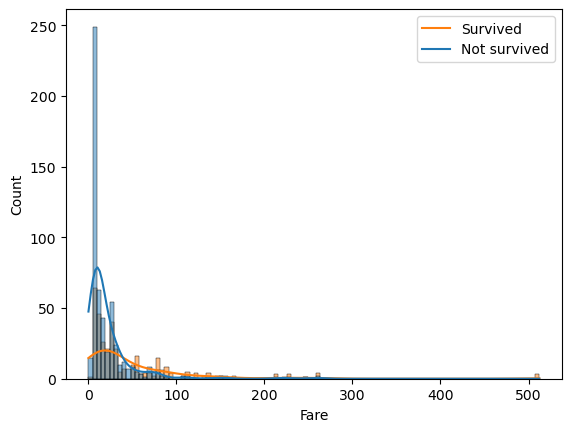

In [45]:
sns.histplot(x='Fare',hue='Survived',data=data,kde=True)
plt.legend(labels=['Survived','Not survived'])
plt.show()

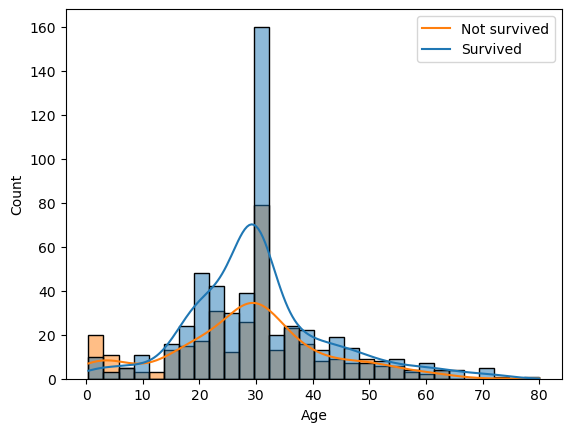

In [47]:
sns.histplot(x='Age',hue='Survived',data=data,kde=True)
plt.legend(labels=['Not survived','Survived'])
plt.show()

In [48]:
data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':3}},inplace=True)

In [49]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age categories
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,Yound Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,Adult
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,Yound Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,Adult
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,Adult


In [50]:
df_num = data[['Fare','Parch','SibSp','Age','Sex','Pclass','Embarked','Survived']]

In [51]:
df_num

,Fare,Parch,SibSp,Age,Sex,Pclass,Embarked,Survived
0,7.2500,0,1,22.000000,0,3,0,0
1,71.2833,0,1,38.000000,1,1,1,1
2,7.9250,0,0,26.000000,1,3,0,1
3,53.1000,0,1,35.000000,1,1,0,1
4,8.0500,0,0,35.000000,0,3,0,0
...,...,...,...,...,...,...,...,...
886,13.0000,0,0,27.000000,0,2,0,0
887,30.0000,0,0,19.000000,1,1,0,1
888,23.4500,2,1,29.699118,1,3,0,0
889,30.0000,0,0,26.000000,0,1,1,1


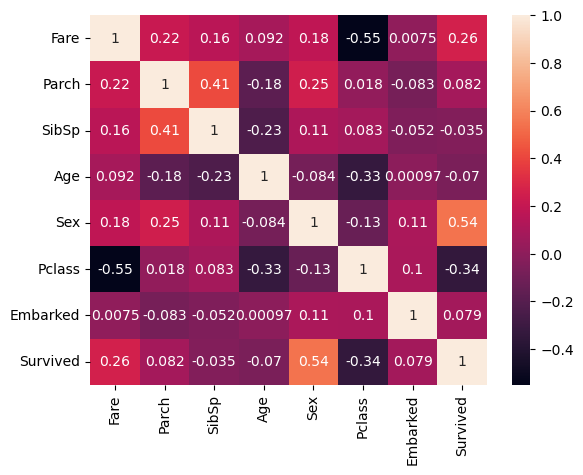

In [52]:
sns.heatmap(df_num.corr(),annot=True)
plt.show()